In [1]:
#Import Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from tqdm import tqdm
import matplotlib.pyplot as plt


In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.device_count()

1

In [4]:
torch.cuda.current_device()

0

In [5]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3060'

In [6]:
#Set Parameters here
epochs = 200000
batch_size = 1000
train_points = 1000 # 60k total training examples, 10k test examples
test_points = 1000
lr = 0.001
weight_decay = 0.01
initialization_scale = 8.0
#Optmization steps should be train_points/batchsize * epochs 
print(train_points/batch_size * epochs)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')


200000.0


In [7]:
print(device)

cuda:0


In [8]:
#Network Structure
class mnistClassification(nn.Module):
    def __init__(self):
        super(mnistClassification, self).__init__()
        self.flatten = nn.Flatten().to(device)
        self.fc1 = nn.Linear(784, 200).to(device)
        self.fc2 = nn.Linear(200, 200).to(device)
        self.fc3 = nn.Linear(200, 10).to(device)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

model = mnistClassification().to(device)

with torch.no_grad(): 
    for p in model.parameters(): 
        p.data = initialization_scale * p.data

In [9]:
#Load Data set
train = torchvision.datasets.MNIST(root='mnistdata', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test = torchvision.datasets.MNIST(root='mnistdata', train=False, transform=torchvision.transforms.ToTensor(), download=True)
train = torch.utils.data.Subset(train, range(train_points))
test = torch.utils.data.Subset(test, range(test_points))
train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

print(len(train_loader))
print(len(test_loader))

1
1


Epoch [10000/200000], Loss: 0.0000, Train Accuracy: 1.0000, Val Accuracy: 0.8350, Weight Norm: 149.6709:   5%|▍         | 9998/200000 [10:24<3:30:17, 15.06it/s]

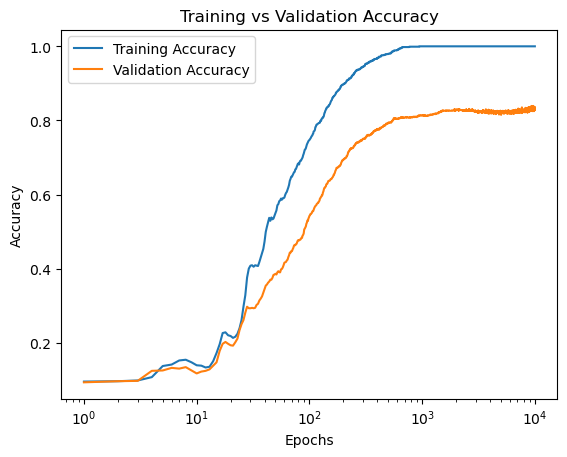

Epoch [20000/200000], Loss: 0.0000, Train Accuracy: 1.0000, Val Accuracy: 0.8560, Weight Norm: 141.8049:  10%|▉         | 19998/200000 [21:05<3:25:11, 14.62it/s]

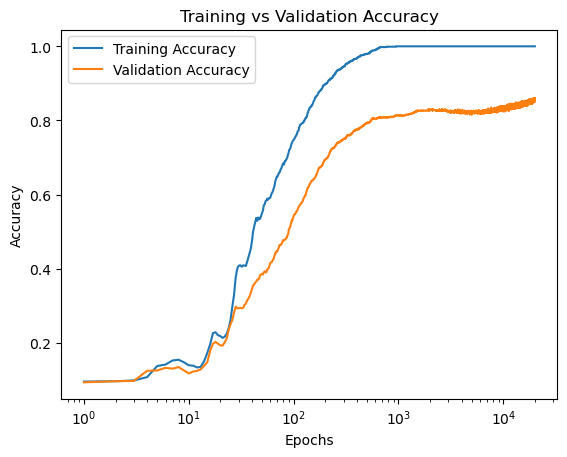

Epoch [30000/200000], Loss: 0.0003, Train Accuracy: 1.0000, Val Accuracy: 0.8720, Weight Norm: 136.3848:  15%|█▍        | 29998/200000 [31:36<2:56:11, 16.08it/s]

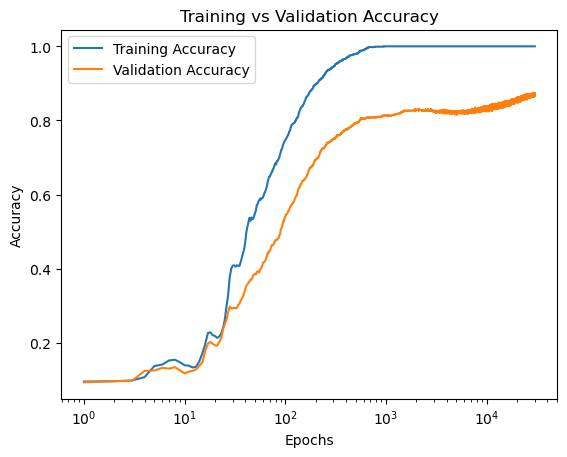

Epoch [40000/200000], Loss: 0.0001, Train Accuracy: 1.0000, Val Accuracy: 0.8780, Weight Norm: 132.7365:  20%|█▉        | 39998/200000 [41:33<2:46:18, 16.03it/s]

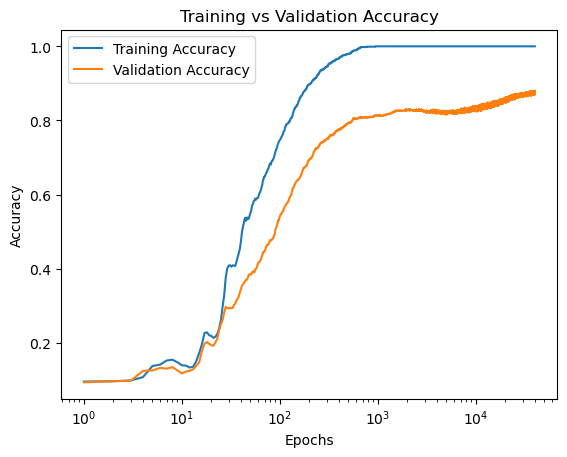

Epoch [50000/200000], Loss: 0.0000, Train Accuracy: 1.0000, Val Accuracy: 0.8780, Weight Norm: 130.2960:  25%|██▍       | 49998/200000 [52:14<2:35:03, 16.12it/s]

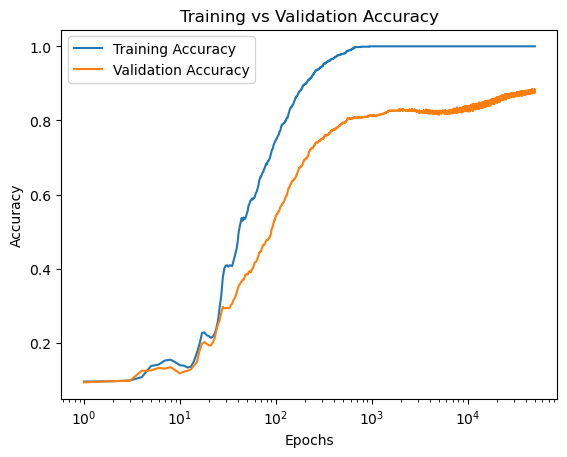

Epoch [60000/200000], Loss: 0.0000, Train Accuracy: 1.0000, Val Accuracy: 0.8820, Weight Norm: 128.6327:  30%|██▉       | 59998/200000 [1:02:58<2:15:21, 17.24it/s]

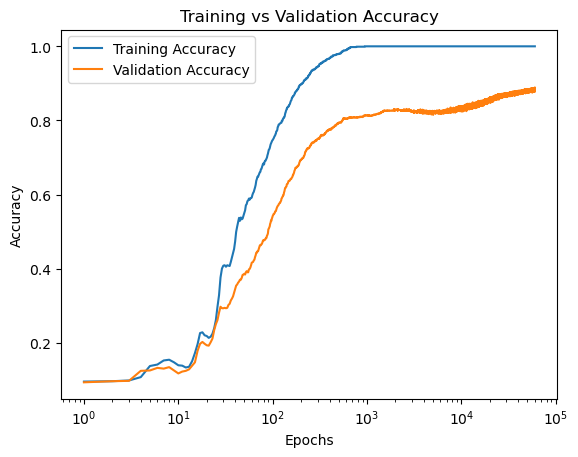

Epoch [70000/200000], Loss: 0.0000, Train Accuracy: 1.0000, Val Accuracy: 0.8820, Weight Norm: 127.4120:  35%|███▍      | 69998/200000 [1:13:45<2:15:45, 15.96it/s]

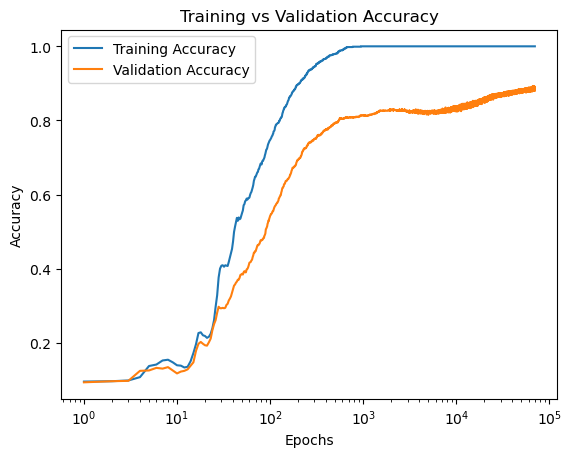

Epoch [80000/200000], Loss: 0.0000, Train Accuracy: 1.0000, Val Accuracy: 0.8890, Weight Norm: 126.4279:  40%|███▉      | 79999/200000 [1:24:40<2:16:11, 14.68it/s]

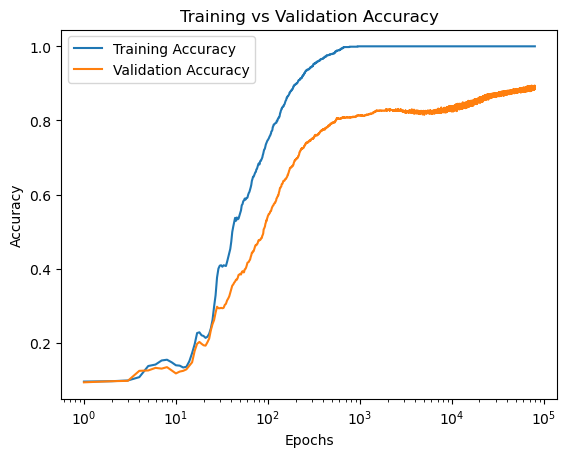

Epoch [90000/200000], Loss: 0.0001, Train Accuracy: 1.0000, Val Accuracy: 0.8920, Weight Norm: 125.5296:  45%|████▍     | 89999/200000 [1:35:36<2:00:39, 15.19it/s]

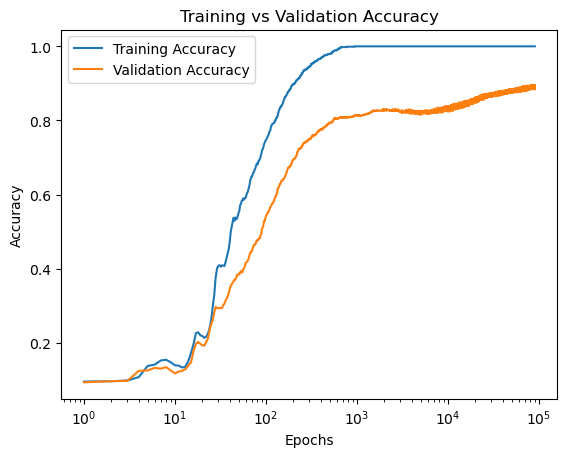

Epoch [100000/200000], Loss: 0.0001, Train Accuracy: 1.0000, Val Accuracy: 0.8930, Weight Norm: 124.6334:  50%|████▉     | 99999/200000 [1:46:13<1:42:51, 16.20it/s]

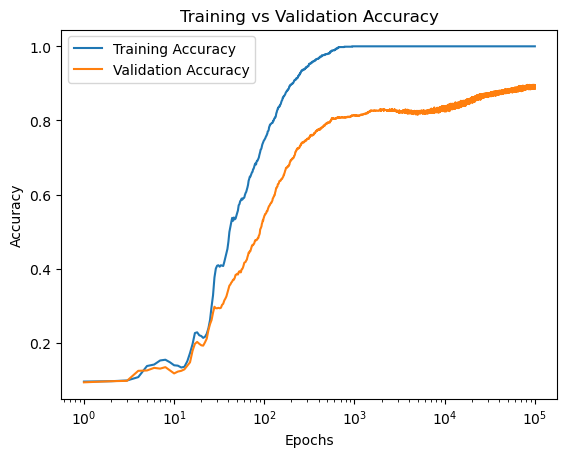

Epoch [110000/200000], Loss: 0.0000, Train Accuracy: 1.0000, Val Accuracy: 0.8900, Weight Norm: 123.7530:  55%|█████▍    | 109999/200000 [1:56:20<1:36:35, 15.53it/s]

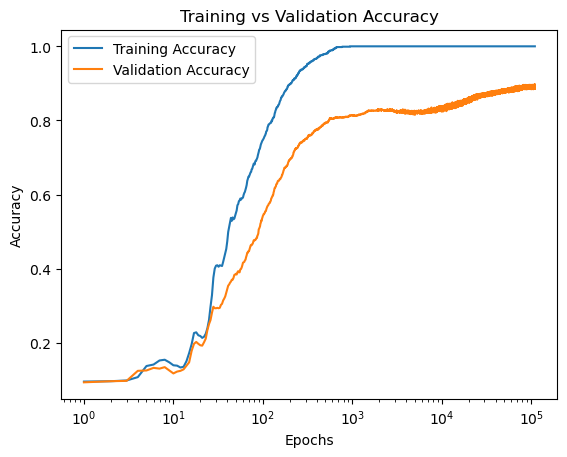

Epoch [120000/200000], Loss: 0.0000, Train Accuracy: 1.0000, Val Accuracy: 0.8910, Weight Norm: 122.8214:  60%|█████▉    | 119999/200000 [2:06:24<1:19:29, 16.77it/s]

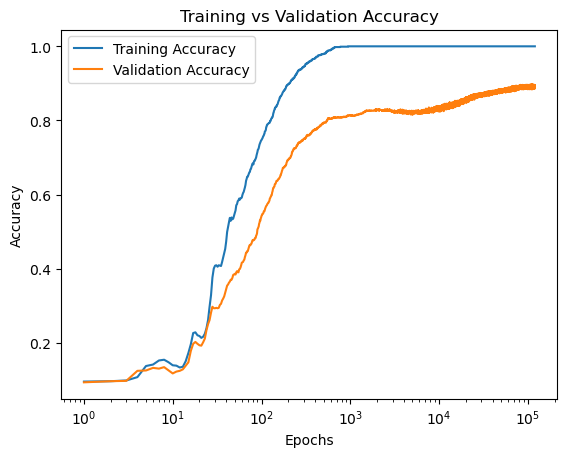

Epoch [130000/200000], Loss: 0.0000, Train Accuracy: 1.0000, Val Accuracy: 0.8900, Weight Norm: 121.8259:  65%|██████▍   | 129999/200000 [2:16:36<1:09:26, 16.80it/s]

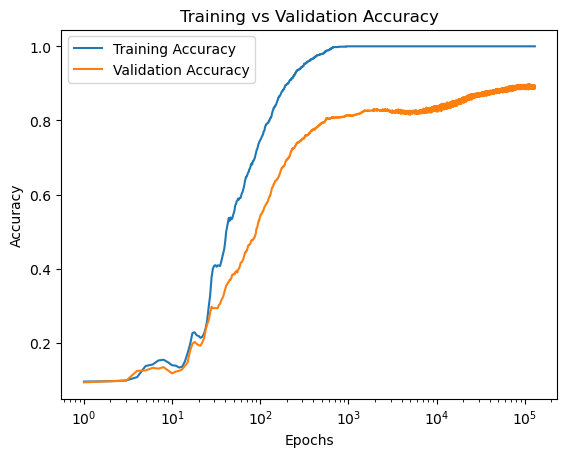

Epoch [140000/200000], Loss: 0.0000, Train Accuracy: 1.0000, Val Accuracy: 0.8890, Weight Norm: 120.7898:  70%|██████▉   | 139999/200000 [2:26:44<1:00:22, 16.56it/s]

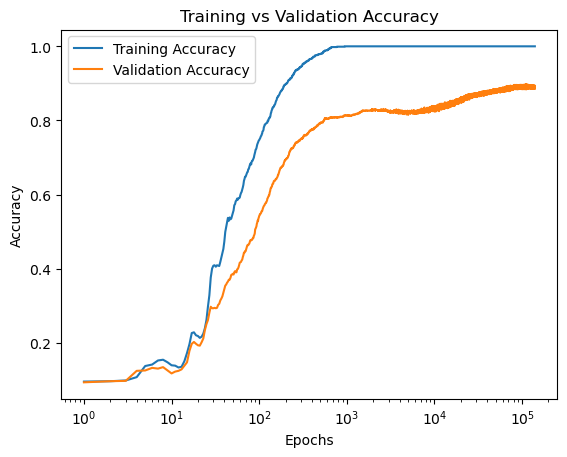

Epoch [150000/200000], Loss: 0.0000, Train Accuracy: 1.0000, Val Accuracy: 0.8880, Weight Norm: 119.7657:  75%|███████▍  | 149999/200000 [2:38:21<49:15, 16.92it/s]  

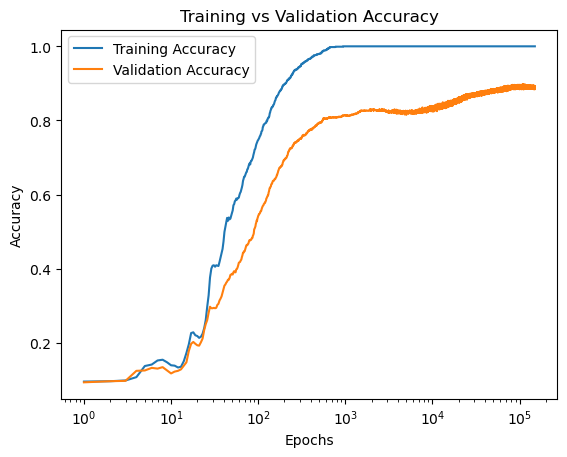

Epoch [160000/200000], Loss: 0.0000, Train Accuracy: 1.0000, Val Accuracy: 0.8890, Weight Norm: 118.7557:  80%|███████▉  | 159999/200000 [2:48:57<43:13, 15.43it/s]  

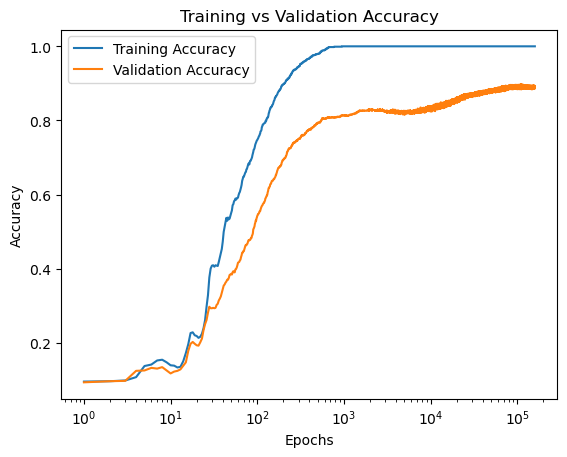

Epoch [162971/200000], Loss: 0.0000, Train Accuracy: 1.0000, Val Accuracy: 0.8930, Weight Norm: 118.4423:  81%|████████▏ | 162971/200000 [2:52:08<39:36, 15.58it/s]  

In [ ]:
#Training

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

train_acc = []
val_acc = []
train_loss = []
weight_normlist = []

#Loop
bar = tqdm(range(epochs))
for epoch in bar:
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        labels_one_hot = F.one_hot(labels, 10).float()
        loss = criterion(outputs, labels_one_hot)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Calculate Train Accuracy
    _, predicted = torch.max(outputs.data, 1)
    correct_train += (predicted == labels).sum().item()
    total_train += labels.size(0)
    train_accuracy = correct_train / total_train
    train_acc.append(train_accuracy)
    
    # Store loss
    train_loss.append(loss.item())
    
    # Calculate Validation Accuracy
    model.eval()
    total = 0
    correct = 0
    with torch.no_grad():
        for x, labels in test_loader:
            x = x.to(device)
            labels = labels.to(device)
            y = model(x)
            _, predicted = torch.max(y, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)
    val_accuracy = correct / total
    val_acc.append(val_accuracy)

    # Calculate Weight Norm
    weight_norm = sum(p.norm().item() for p in model.parameters())
    weight_normlist.append(weight_norm)
    
    # Print progress
    bar.set_description(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}, Weight Norm: {weight_norm:.4f}')
    
    # Plot graph every 50,000 epochs
    if (epoch + 1) % 10000 == 0:
        import matplotlib.pyplot as plt
        plt.xscale("log")
        plt.plot(range(1, epoch + 2), train_acc, label='Training Accuracy')
        plt.plot(range(1, epoch + 2), val_acc, label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Training vs Validation Accuracy')
        plt.legend()
        plt.show()


In [ ]:
#Evaluate
model.eval()
total = 0
correct = 0
one_hots = torch.eye(10, 10)
with torch.no_grad():
        for x, labels in test_loader:
            x = x.to(device)
            labels = labels.to(device)
            y = model(x)
            _, predicted = torch.max(y,1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)


print(f'Accuracy: {100 * correct / total:.2f}%')

Accuracy: 79.20%


Accuracy: 79.20%


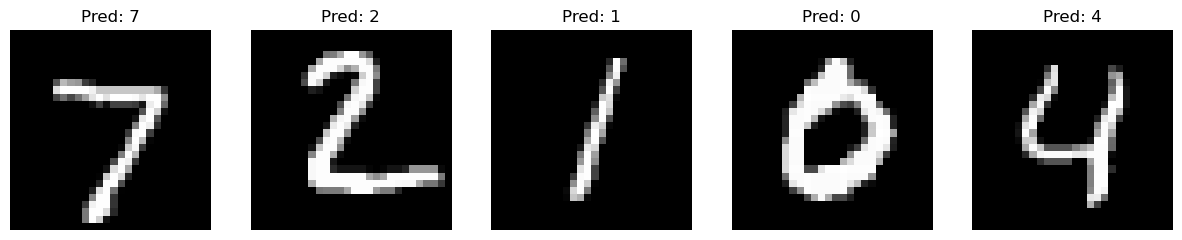

In [ ]:
import matplotlib.pyplot as plt

# Function to display images and predictions
def display_predictions(model, testloader, num_images=5):
    model.eval()
    images, labels = next(iter(testloader))
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 3))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].to("cpu").numpy().squeeze(), cmap='gray')
        ax.set_title(f'Pred: {predicted[i].item()}')
        ax.axis('off')
    plt.show()

# Evaluate the model
model.eval()
correct = 0
total = 0
one_hots = torch.eye(10, 10)

with torch.no_grad():
    for x, labels in test_loader:
        x = x.to(device)
        labels = labels.to(device)
        y = model(x)
        _, predicted = torch.max(y, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f'Accuracy: {100 * accuracy:.2f}%')

# Display example predictions
display_predictions(model, test_loader, num_images=5)


In [ ]:
"""#Training

criterion = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)

train_acc = []
val_acc = []
train_loss = []
weight_normlist = []

#Loop
bar = tqdm(range(epochs))
for epoch in bar:
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        labels_one_hot = F.one_hot(labels, 10).float()
        loss = criterion(outputs, labels_one_hot)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    #Calculate Train Accuracy
    _, predicted = torch.max(outputs.data, 1)
    correct_train += (predicted == labels).sum().item()
    total_train += labels.size(0)
    train_accuracy = correct_train / total_train
    train_acc.append(train_accuracy)
    #Store loss
    train_loss.append(loss)
    #Calculate Validation Accuracy
    model.eval()
    total = 0
    correct = 0
    one_hots = torch.eye(10, 10)
    with torch.no_grad():
            for x, labels in test_loader:
                y = model(x)
                _, predicted = torch.max(y,1)
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
    val_accuracy = correct / total
    val_acc.append(val_accuracy)

    #Calculate Weight Norm
    weight_norm = sum(p.norm().item() for p in model.parameters())
    weight_normlist.append(weight_norm)
    #print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')
    bar.set_description(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Val Accuracy: {val_accuracy:.4f}, Weight Norm: {weight_norm:.4f}')"""

"#Training\n\ncriterion = nn.MSELoss()\noptimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)\n\ntrain_acc = []\nval_acc = []\ntrain_loss = []\nweight_normlist = []\n\n#Loop\nbar = tqdm(range(epochs))\nfor epoch in bar:\n    model.train()\n    running_loss = 0.0\n    correct_train = 0\n    total_train = 0\n    \n    for images, labels in train_loader:\n        optimizer.zero_grad()\n        outputs = model(images)\n        labels_one_hot = F.one_hot(labels, 10).float()\n        loss = criterion(outputs, labels_one_hot)\n        loss.backward()\n        optimizer.step()\n        running_loss += loss.item()\n\n    #Calculate Train Accuracy\n    _, predicted = torch.max(outputs.data, 1)\n    correct_train += (predicted == labels).sum().item()\n    total_train += labels.size(0)\n    train_accuracy = correct_train / total_train\n    train_acc.append(train_accuracy)\n    #Store loss\n    train_loss.append(loss)\n    #Calculate Validation Accuracy\n    model.eval()\n    tot